## User Rating of a restaurant plays a crucial role in selecting a restaurant or ordering the food from the restaurant.

### 1. Write a short detail analysis of how the rating is affected by restaurant due following features: Plot a suitable graph to explain your inference.

In [1]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
with open("zomato.csv", errors = "ignore", encoding = "utf-8") as file:
    file_data = csv.DictReader(file, skipinitialspace = True)
    file_list = list(file_data)
    
zomato = pd.DataFrame(file_list)

#### 1.1Number of Votes given Restaurant

In [3]:
def dtype(i):
    return int(float(i))
zomato["Votes"] = zomato["Votes"].apply(dtype)   #Changing the data type as it is in string

def dtype2(i):
    if float(i) != 0:
        return float(i)

zomato["Aggregate rating"] = zomato["Aggregate rating"].apply(dtype2) #Changing the data type as it is in string

votes = [int(i) for i in zomato.Votes]
rating = [i for i in zomato["Aggregate rating"]]

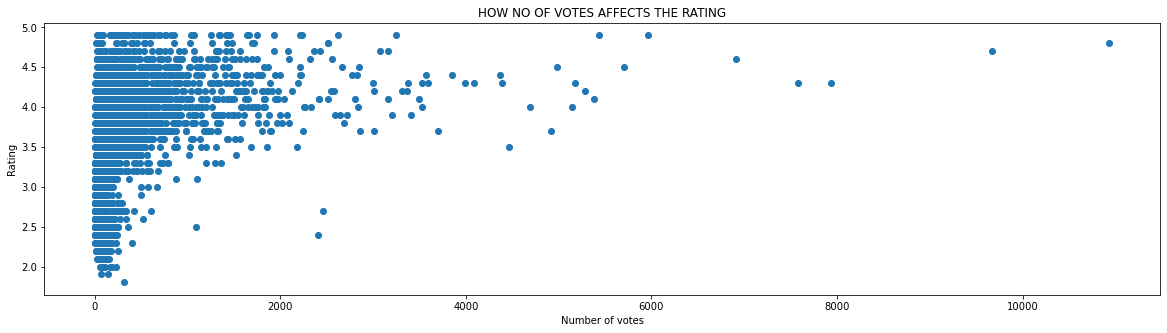

In [4]:
#plot graph
plt.subplots(figsize = (20,5))
plt.scatter(votes, rating)
plt.title("HOW NO OF VOTES AFFECTS THE RATING")
plt.xlabel("Number of votes")
plt.ylabel("Rating")
plt.show()

#### 1.2 Restaurant serving more number of cuisines.

In [5]:
def li(i):
    i = i.split(", ")
    return len(i) 

z = zomato["Cuisines"].apply(li).values #List of number of cuisines

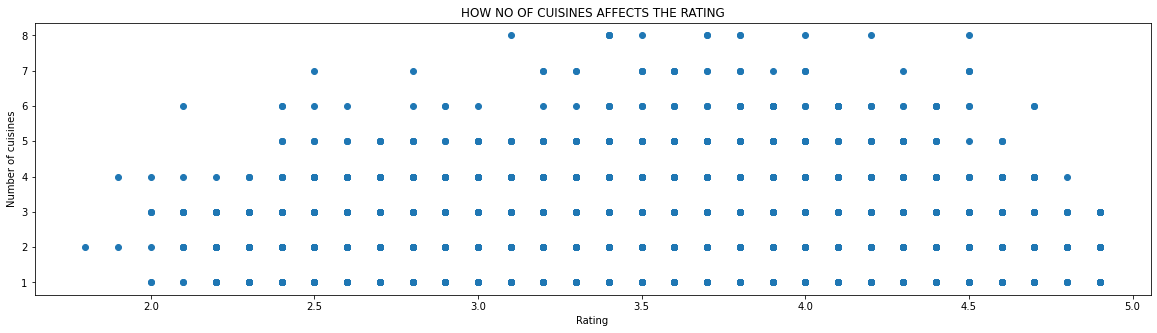

In [6]:
#plot graph
plt.subplots(figsize = (20,5))
plt.scatter(rating, z)
plt.title("HOW NO OF CUISINES AFFECTS THE RATING")
plt.ylabel("Number of cuisines")
plt.xlabel("Rating")
plt.show()

#### 1.3 Average Cost of Restaurant

In [7]:
avg =  zomato["Average Cost for two"].apply(dtype).values

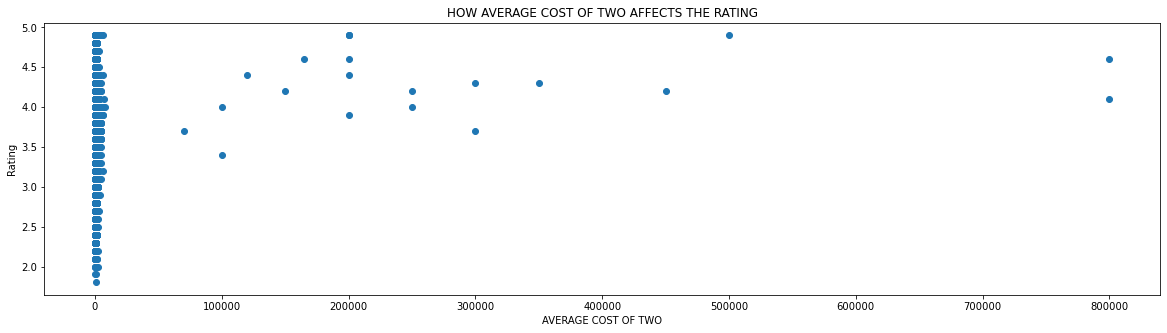

In [8]:
#plot graph
plt.subplots(figsize = (20,5))
plt.scatter(avg, rating)
plt.title("HOW AVERAGE COST OF TWO AFFECTS THE RATING")
plt.xlabel("AVERAGE COST OF TWO")
plt.ylabel("Rating")
plt.show()

### 2. Find the weighted restaurant rating of each locality and find out the top 10 localities with more weighted restaurant rating

#### Weighted Restaurant Rating=Σ (number of votes * rating) / Σ (number of votes) .

In [9]:
zomato = zomato[zomato["Country Code"] == "1"]

In [10]:
a = zomato["Aggregate rating"] * zomato["Votes"] #Multiple to get Submision of rating * votes
zomato["Weighted"] = a

In [11]:
z_loc = zomato.groupby("Locality")["Weighted", "Votes"].sum().sort_values(by = "Votes" , ascending = False)
#Creating A sepretae dataframe using groupby function

def div(w, v):
    return w/v

z_loc["Weightage"] = div(z_loc["Weighted"], z_loc["Votes"])  #Finding weightage of each locality
z_loc = z_loc.sort_values(by = "Weightage", ascending = False)[:10] #Sort the dataframse and gt top 10 locality

<ipython-input-11-f893ad66e5b1>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  z_loc = zomato.groupby("Locality")["Weighted", "Votes"].sum().sort_values(by = "Votes" , ascending = False)


In [12]:
arr_w = []
arr_l = []

for i in z_loc["Weightage"].values:
    arr_w.append(i)

for i in z_loc.index:
    arr_l.append(i)

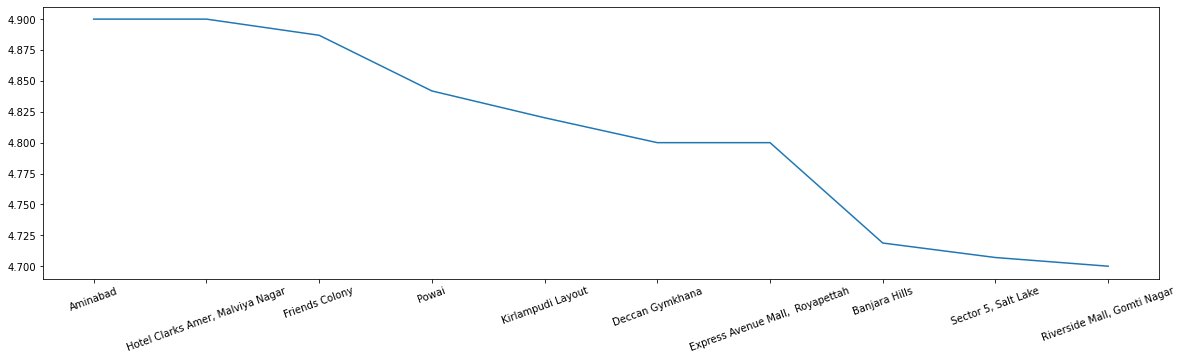

In [13]:
#Plot Graph
plt.subplots(figsize = (20,5))
plt.plot(arr_l, arr_w)
plt.xticks(rotation = 20)
plt.show()